<a href="https://colab.research.google.com/github/vitorsr/ccd/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando dados

In [0]:
import pandas as pd
import os

In [2]:
!wget https://www.dropbox.com/s/7rriacb7c6vzf3m/ccd_2019.zip -O ccd_2019.zip
!unzip ccd_2019.zip

--2019-10-25 23:43:08--  https://www.dropbox.com/s/7rriacb7c6vzf3m/ccd_2019.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rriacb7c6vzf3m/ccd_2019.zip [following]
--2019-10-25 23:43:08--  https://www.dropbox.com/s/raw/7rriacb7c6vzf3m/ccd_2019.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb5672dcb58eb2db049874feb21.dl.dropboxusercontent.com/cd/0/inline/ArLNzK43V_IIqxWcfHIuV1jtBVfUzRbPQHuMyXctQqh1Gere93LfY_2fxJsSTbVRwnjdde5UIjJMws8eh8XnvxtV6KQ_QMvPX5zffiT7Q6SHoPBrZWQr0XMfXRXbgxj4cGg/file# [following]
--2019-10-25 23:43:08--  https://ucb5672dcb58eb2db049874feb21.dl.dropboxusercontent.com/cd/0/inline/ArLNzK43V_IIqxWcfHIuV1jtBVfUzRbPQHuMyXctQqh1Gere93LfY_2fxJsSTbVRwnjdde5UIjJMws8eh8XnvxtV6KQ_QMvPX5zffiT7Q6SHoPBrZW

Import csvs from git

In [0]:
df_m = pd.read_csv("bdmep_meta.csv")

In [0]:
df = pd.read_csv("inmetr.csv")

In [5]:
df.head()

,date,id,prec,tair,tw,tmax,tmin,urmax,patm,pnmm,wd,wsmax,n,cc,evap,ur,ws
0,1970-05-04 00:00:00,83010,NaN,NaN,NaN,32.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.75,NaN
1,1970-05-04 12:00:00,83010,NaN,25.3,24.0,NaN,23.7,90.0,1005.9,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
2,1970-05-04 18:00:00,83010,NaN,29.2,27.1,NaN,NaN,85.0,1004.2,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
3,1970-05-05 00:00:00,83010,NaN,25.0,27.0,32.6,NaN,92.0,1007.5,NaN,NaN,NaN,NaN,8.0,2.4,88.25,NaN
4,1970-05-05 12:00:00,83010,0.0,25.9,24.8,NaN,23.0,91.0,1006.4,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN


In [6]:
df_m.head()

,id,lon,lat,alt,name,state,uf,time_zone,offset_utc,time_zone.1,offset_utc.1
0,83010,-68.733333,-11.016667,260.00,Brasiléia,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5
1,82704,-72.666667,-7.633333,170.00,Cruzeiro do Sul,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5
2,82915,-67.800000,-9.966667,160.00,Rio Branco,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5
3,82807,-70.766667,-8.166667,190.00,Tarauacá,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5
4,83098,-36.166667,-10.150000,56.13,Coruripe,Alagoas,AL,America/Maceio,-3,America/Maceio,-3


### Dicionário de dados:

<br><b>variável | descrição | unidade </b></br>
<br>date | data e hora da coleta             -
<br> id | ID da estação de coleta             -
<br>prec | precipitação |       mm
<br>tair | temperatura do ar  | graus Celsius
<br>tw | temperatura de bulbo úmido |  graus Celsius
<br>tmax | temperatura máxima do ar  | graus Celsius
<br>tmin | temperatura mínima do ar  | graus Celsius
<br>urmax | umidade relativa máxima  |             %
<br>patm | pressão atmosférica         |    hPa
<br>pnmm | pressão atmosférica média ao nível do mar  |           hPa
<br>wd | direção do vento        |   graus
<br>wsmax  |  rajadas de vento    |         m/s
<br>n |  horas de sol          |     h
<br>cc |   cobertura de nuvens    |           -
<br>evap  |   evaporação        |      mm
<br>ur  |   umidade relativa          |     %
<br>ws   |   velocidade do vento       |      m/s



## Explorando

> **Hipótese**: as queimadas que ocorreram na amazônia, entre 8 e 22 de Agosto de 2019 influenciaram as temperaturas na região e/ou no restante do país?

Primeiramente, vamos fazer que a coluna date seja do tipo **datetime**

In [7]:
df.head()

,date,id,prec,tair,tw,tmax,tmin,urmax,patm,pnmm,wd,wsmax,n,cc,evap,ur,ws
0,1970-05-04 00:00:00,83010,NaN,NaN,NaN,32.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.75,NaN
1,1970-05-04 12:00:00,83010,NaN,25.3,24.0,NaN,23.7,90.0,1005.9,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
2,1970-05-04 18:00:00,83010,NaN,29.2,27.1,NaN,NaN,85.0,1004.2,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
3,1970-05-05 00:00:00,83010,NaN,25.0,27.0,32.6,NaN,92.0,1007.5,NaN,NaN,NaN,NaN,8.0,2.4,88.25,NaN
4,1970-05-05 12:00:00,83010,0.0,25.9,24.8,NaN,23.0,91.0,1006.4,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN


In [8]:
df.dtypes

date      object
id         int64
prec     float64
tair     float64
tw       float64
tmax     float64
tmin     float64
urmax    float64
patm     float64
pnmm     float64
wd       float64
wsmax    float64
n        float64
cc       float64
evap     float64
ur       float64
ws       float64
dtype: object

In [0]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
df.dtypes

date     datetime64[ns]
id                int64
prec            float64
tair            float64
tw              float64
tmax            float64
tmin            float64
urmax           float64
patm            float64
pnmm            float64
wd              float64
wsmax           float64
n               float64
cc              float64
evap            float64
ur              float64
ws              float64
dtype: object

> <b>Não</b> temos dados de <b>2019</b>!!! Vamos baixar da fonte

In [11]:
!wget "https://onedrive.live.com/download?cid=BCBADB0836C97273&resid=BCBADB0836C97273%21115485&authkey=AJlb41BWz0YiBd8" -O 2019.zip
!unzip 2019.zip

--2019-10-25 23:43:47--  https://onedrive.live.com/download?cid=BCBADB0836C97273&resid=BCBADB0836C97273%21115485&authkey=AJlb41BWz0YiBd8
Resolving onedrive.live.com (onedrive.live.com)... 13.107.42.13
Connecting to onedrive.live.com (onedrive.live.com)|13.107.42.13|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://c9quda.bn.files.1drv.com/y4mb07ei-ZvmiiDMz0a2DP1uW3XfvF8dAzIqmH13GFKlQ1-PwEQHvV0Cmibw3Sv4O0DCiI0ytNbUxCtctJoLiKznRzqJS9fxZvQVYyVh-v6l0uiyVWrATQeO9aJ5zVBNlda3larkxeMpcmY9pQhRWoEPJnmNqzmVbxFsGomKNZCvLyfCV3WE_d0MgQVwez1CwOzkORhUmg8nTXzlDuOpKUiNA/2019.zip?download&psid=1 [following]
--2019-10-25 23:43:52--  https://c9quda.bn.files.1drv.com/y4mb07ei-ZvmiiDMz0a2DP1uW3XfvF8dAzIqmH13GFKlQ1-PwEQHvV0Cmibw3Sv4O0DCiI0ytNbUxCtctJoLiKznRzqJS9fxZvQVYyVh-v6l0uiyVWrATQeO9aJ5zVBNlda3larkxeMpcmY9pQhRWoEPJnmNqzmVbxFsGomKNZCvLyfCV3WE_d0MgQVwez1CwOzkORhUmg8nTXzlDuOpKUiNA/2019.zip?download&psid=1
Resolving c9quda.bn.files.1drv.com (c9quda.bn.files.1drv.com)... 1

In [12]:
%ls 

2019/     bdmep_meta.csv  inmetr_201908.csv  __MACOSX/
2019.zip  ccd_2019.zip    inmetr.csv         sample_data/


In [13]:
%cd 2019

/content/2019


In [14]:
%ls

82024.csv  82445.csv  82777.csv  83049.csv  83338.csv  83565.csv  83767.csv
82042.csv  82460.csv  82780.csv  83064.csv  83339.csv  83577.csv  83781.csv
82098.csv  82476.csv  82784.csv  83076.csv  83358.csv  83579.csv  83789.csv
82106.csv  82487.csv  82792.csv  83090.csv  83361.csv  83587.csv  83805.csv
82113.csv  82493.csv  82795.csv  83096.csv  83368.csv  83589.csv  83807.csv
82141.csv  82533.csv  82797.csv  83097.csv  83376.csv  83591.csv  83811.csv
82145.csv  82562.csv  82798.csv  83114.csv  83377.csv  83592.csv  83813.csv
82178.csv  82564.csv  82807.csv  83179.csv  83379.csv  83623.csv  83836.csv
82181.csv  82571.csv  82861.csv  83182.csv  83384.csv  83630.csv  83842.csv
82184.csv  82578.csv  82863.csv  83184.csv  83386.csv  83632.csv  83844.csv
82188.csv  82586.csv  82882.csv  83186.csv  83393.csv  83639.csv  83851.csv
82191.csv  82588.csv  82886.csv  83190.csv  83423.csv  83648.csv  83897.csv
82198.csv  82590.csv  82890.csv  83192.csv  83428.csv  83669.csv  83907.csv
82212.csv  8

In [15]:
%cd ..

/content


In [0]:
directory = '2019'
files = []
for filename in os.listdir(directory):
    if filename.endswith(".csv"): 
        files.append(filename)
        continue
    else:
        continue

In [17]:
files

['82562.csv',
 '83565.csv',
 '83339.csv',
 '83737.csv',
 '83309.csv',
 '83718.csv',
 '82768.csv',
 '82784.csv',
 '83980.csv',
 '83985.csv',
 '82397.csv',
 '83813.csv',
 '82571.csv',
 '83630.csv',
 '82263.csv',
 '83479.csv',
 '83033.csv',
 '83179.csv',
 '83587.csv',
 '83182.csv',
 '83228.csv',
 '83222.csv',
 '83186.csv',
 '82410.csv',
 '83114.csv',
 '83907.csv',
 '83384.csv',
 '83488.csv',
 '83498.csv',
 '83648.csv',
 '83897.csv',
 '82900.csv',
 '82979.csv',
 '83423.csv',
 '83995.csv',
 '82777.csv',
 '83236.csv',
 '83914.csv',
 '83464.csv',
 '83242.csv',
 '83696.csv',
 '83842.csv',
 '83358.csv',
 '82686.csv',
 '83097.csv',
 '83692.csv',
 '82668.csv',
 '83076.csv',
 '83789.csv',
 '82683.csv',
 '83437.csv',
 '83766.csv',
 '83235.csv',
 '82797.csv',
 '82113.csv',
 '83948.csv',
 '83332.csv',
 '83195.csv',
 '82353.csv',
 '82886.csv',
 '83836.csv',
 '82678.csv',
 '82807.csv',
 '83726.csv',
 '83393.csv',
 '82280.csv',
 '83589.csv',
 '82460.csv',
 '82861.csv',
 '83470.csv',
 '82976.csv',
 '8385

In [18]:
len(files)

195

In [0]:
df = pd.DataFrame()
for file in files:
    df_aux = pd.read_csv(directory+'/'+file, delimiter=',')
    df = pd.concat([df_aux, df], sort=True)

In [20]:
df

,cc,date,evap,id,n,patm,pnmm,prec,request_status,tair,tmax,tmin,tw,ur,urmax,wd,ws,wsmax
0,-9999.00,2019-01-01T00:00:00Z,3.0,83632,-9999.0,-9999.0,-9999.0,-9999.0,Success: (200) OK,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999.0,-9999.0
1,-9999.00,2019-01-01T12:00:00Z,-9999.0,83632,-9999.0,-9999.0,-9999.0,6.2,Success: (200) OK,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999.0,-9999.0
2,-9999.00,2019-01-02T00:00:00Z,2.0,83632,-9999.0,-9999.0,-9999.0,-9999.0,Success: (200) OK,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999.0,-9999.0
3,-9999.00,2019-01-02T12:00:00Z,-9999.0,83632,-9999.0,-9999.0,-9999.0,0.0,Success: (200) OK,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999.0,-9999.0
4,-9999.00,2019-01-03T00:00:00Z,3.5,83632,-9999.0,-9999.0,-9999.0,-9999.0,Success: (200) OK,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,2.50,2019-08-02T12:00:00Z,-9999.0,82562,-9999.0,1003.6,1014.3,0.0,Success: (200) OK,28.3,-9999.0,23.0,-9999.0,-9999.0,77,36,-9999.0,-9999.0
504,3.75,2019-08-02T18:00:00Z,-9999.0,82562,-9999.0,1000.6,1011.3,-9999.0,Success: (200) OK,35.5,-9999.0,-9999.0,-9999.0,-9999.0,47,14,-9999.0,-9999.0
505,0.00,2019-08-03T00:00:00Z,-9999.0,82562,-9999.0,1002.9,1013.6,-9999.0,Success: (200) OK,30.3,-9999.0,-9999.0,-9999.0,-9999.0,66,9,-9999.0,-9999.0
506,-9999.00,2019-08-03T12:00:00Z,-9999.0,82562,-9999.0,-9999.0,-9999.0,0.0,Success: (200) OK,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999.0,-9999.0



Vamos selecionar o período desejado para a análise: 01/Ago a 31/Ago

In [21]:
df.dtypes

cc                float64
date               object
evap              float64
id                  int64
n                 float64
patm              float64
pnmm              float64
prec              float64
request_status     object
tair              float64
tmax              float64
tmin              float64
tw                float64
ur                float64
urmax               int64
wd                  int64
ws                float64
wsmax             float64
dtype: object

In [22]:
df.head(10)

,cc,date,evap,id,n,patm,pnmm,prec,request_status,tair,tmax,tmin,tw,ur,urmax,wd,ws,wsmax
0,-9999.0,2019-01-01T00:00:00Z,3.0,83632,-9999.0,-9999.0,-9999.0,-9999.0,Success: (200) OK,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999.0,-9999.0
1,-9999.0,2019-01-01T12:00:00Z,-9999.0,83632,-9999.0,-9999.0,-9999.0,6.2,Success: (200) OK,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999.0,-9999.0
2,-9999.0,2019-01-02T00:00:00Z,2.0,83632,-9999.0,-9999.0,-9999.0,-9999.0,Success: (200) OK,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999.0,-9999.0
3,-9999.0,2019-01-02T12:00:00Z,-9999.0,83632,-9999.0,-9999.0,-9999.0,0.0,Success: (200) OK,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999.0,-9999.0
4,-9999.0,2019-01-03T00:00:00Z,3.5,83632,-9999.0,-9999.0,-9999.0,-9999.0,Success: (200) OK,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999.0,-9999.0
5,-9999.0,2019-01-03T12:00:00Z,-9999.0,83632,-9999.0,-9999.0,-9999.0,9.4,Success: (200) OK,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999.0,-9999.0
6,-9999.0,2019-01-04T00:00:00Z,2.7,83632,-9999.0,-9999.0,-9999.0,-9999.0,Success: (200) OK,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999.0,-9999.0
7,-9999.0,2019-01-04T12:00:00Z,-9999.0,83632,-9999.0,-9999.0,-9999.0,0.0,Success: (200) OK,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999.0,-9999.0
8,-9999.0,2019-01-05T00:00:00Z,2.2,83632,-9999.0,-9999.0,-9999.0,-9999.0,Success: (200) OK,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999.0,-9999.0
9,-9999.0,2019-01-05T12:00:00Z,-9999.0,83632,-9999.0,-9999.0,-9999.0,11.1,Success: (200) OK,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999.0,-9999.0


In [23]:
df.dtypes

cc                float64
date               object
evap              float64
id                  int64
n                 float64
patm              float64
pnmm              float64
prec              float64
request_status     object
tair              float64
tmax              float64
tmin              float64
tw                float64
ur                float64
urmax               int64
wd                  int64
ws                float64
wsmax             float64
dtype: object

In [0]:
df['date'] = pd.to_datetime(df['date'])

In [0]:
start_date = pd.to_datetime('01/08/2019 00:00:00', dayfirst=True, utc=True)
end_date = pd.to_datetime('31/08/2019  00:00:00', dayfirst=True, utc=True)

In [26]:
df['date'][0][0]

0   2019-01-01 00:00:00+00:00
0   2019-01-01 00:00:00+00:00
0   2019-01-01 00:00:00+00:00
0   2019-01-01 00:00:00+00:00
0   2019-01-01 00:00:00+00:00
               ...           
0   2019-01-01 00:00:00+00:00
0   2019-01-02 12:00:00+00:00
0   2019-01-01 00:00:00+00:00
0   2019-01-01 00:00:00+00:00
0   2019-01-01 00:00:00+00:00
Name: date, Length: 195, dtype: datetime64[ns, UTC]

In [0]:
mask = (df['date'] > start_date) & (df['date'] < end_date)

In [28]:
df['date'].max()

Timestamp('2019-08-31 18:00:00+0000', tz='UTC')

In [29]:
df['date'].min()

Timestamp('2019-01-01 00:00:00+0000', tz='UTC')

In [0]:
df = df.loc[mask]

In [31]:
df['date'].min()

Timestamp('2019-08-01 12:00:00+0000', tz='UTC')

In [32]:
df['date']

303   2019-08-01 12:00:00+00:00
304   2019-08-02 00:00:00+00:00
305   2019-08-02 12:00:00+00:00
306   2019-08-03 00:00:00+00:00
307   2019-08-03 12:00:00+00:00
                 ...           
503   2019-08-02 12:00:00+00:00
504   2019-08-02 18:00:00+00:00
505   2019-08-03 00:00:00+00:00
506   2019-08-03 12:00:00+00:00
507   2019-08-04 12:00:00+00:00
Name: date, Length: 14103, dtype: datetime64[ns, UTC]

Podemos salvar o csv no git da forma comentada abaixo, porém iremos upar manualmente

In [0]:
## !apt install git

In [0]:
## !git clone https://github.com/vitorsr/ccd.git

In [0]:
df.to_csv('inmetr_201908.csv')

### Sobre a nuvem preta de SP

>Segundo o documento, a passagem da frente fria fez o vento de camadas mais altas da atmosfera (entre mil metros e 5 mil metros de altitude) mudar de direção. Com isso, a fumaça acabou “direcionada para o estado de São Paulo, mas também para a região sul de Mato Grosso, Mato Grosso do Sul e Paraná”. O texto destaca, ainda, que o satélite Terra/MODIS, operado pela Nasa, detectou que uma grande quantidade de fumaça vinda da Bolívia e de Rondônia se encaminhava ao sul do Brasil no dia 17 de agosto. A fumaça, antes concentrada do sul do país, teria ganhado Paraná e Mato Grosso do Sul e alcançado São Paulo no dia 19 de agosto – justamente quando a tarde ficou escura na capital paulistana.<

>Segundo o documento, a passagem da frente fria fez o vento de camadas mais altas da atmosfera (entre mil metros e 5 mil metros de altitude) mudar de direção. Com isso, a fumaça acabou “direcionada para o estado de São Paulo, mas também para a região sul de Mato Grosso, Mato Grosso do Sul e Paraná”. O texto destaca, ainda, que o satélite Terra/MODIS, operado pela Nasa, detectou que uma grande quantidade de fumaça vinda da Bolívia e de Rondônia se encaminhava ao sul do Brasil no dia 17 de agosto. A fumaça, antes concentrada do sul do país, teria ganhado Paraná e Mato Grosso do Sul e alcançado São Paulo no dia 19 de agosto – justamente quando a tarde ficou escura na capital paulistana.

>Para notar a tal frente fria, bastava olhar os termômetros. Segundo o Inmet (Instituto Nacional de Meteorologia), na tarde do domingo (18), a temperatura às 15h era de 28,4°C. No mesmo horário do dia seguinte (19), registrou-se 15,3°C – um declínio de 13°C. Isso deixou o dia encoberto e com garoa em diferentes cidades do estado de São Paulo já no começo da segunda-feira. 

>“A sensação de escuridão foi por conta da formação de uma nuvem bastante baixa e densa, provavelmente uma nuvem Nimbustratus ou Cumulonimbus, que se formou na região de São Paulo, muito próxima a superfície. É normal acontecer, se tem o avanço da frente fria, dependendo das condições de umidade, pode se formar essas nuvens”, explicou o meteorologista do CPTEC, Maicon Veber.

>“As partículas [de fumaça] funcionam como núcleo de condensação da água. Assim, gotículas de chuva menores são formadas, mas em grande quantidade, e isso faz com que uma maior parte da radiação solar seja refletida de volta para o espaço, a ponto de escurecer o solo”, explicou. [fonte](https://www.oeco.org.br/noticias/pesquisadores-descrevem-fenomeno-que-escureceu-sp-e-sua-relacao-com-as-queimadas-na-amazonia/) 

In [36]:
df['id'].nunique()

180

# Baseline

In [0]:
df_m = pd.read_csv("bdmep_meta.csv")
df = pd.read_csv("inmetr.csv")

In [38]:
df.head()

,date,id,prec,tair,tw,tmax,tmin,urmax,patm,pnmm,wd,wsmax,n,cc,evap,ur,ws
0,1970-05-04 00:00:00,83010,NaN,NaN,NaN,32.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.75,NaN
1,1970-05-04 12:00:00,83010,NaN,25.3,24.0,NaN,23.7,90.0,1005.9,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
2,1970-05-04 18:00:00,83010,NaN,29.2,27.1,NaN,NaN,85.0,1004.2,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
3,1970-05-05 00:00:00,83010,NaN,25.0,27.0,32.6,NaN,92.0,1007.5,NaN,NaN,NaN,NaN,8.0,2.4,88.25,NaN
4,1970-05-05 12:00:00,83010,0.0,25.9,24.8,NaN,23.0,91.0,1006.4,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN


In [39]:
df_m.head()

,id,lon,lat,alt,name,state,uf,time_zone,offset_utc,time_zone.1,offset_utc.1
0,83010,-68.733333,-11.016667,260.00,Brasiléia,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5
1,82704,-72.666667,-7.633333,170.00,Cruzeiro do Sul,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5
2,82915,-67.800000,-9.966667,160.00,Rio Branco,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5
3,82807,-70.766667,-8.166667,190.00,Tarauacá,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5
4,83098,-36.166667,-10.150000,56.13,Coruripe,Alagoas,AL,America/Maceio,-3,America/Maceio,-3


In [0]:
df_m= df_m.drop(['lat','lon','alt','time_zone','offset_utc','time_zone.1','offset_utc.1','uf'],axis=1)

In [41]:
df = pd.merge(df,df_m,on='id')
df.head()

,date,id,prec,tair,tw,tmax,tmin,urmax,patm,pnmm,wd,wsmax,n,cc,evap,ur,ws,name,state
0,1970-05-04 00:00:00,83010,NaN,NaN,NaN,32.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.75,NaN,Brasiléia,Acre
1,1970-05-04 12:00:00,83010,NaN,25.3,24.0,NaN,23.7,90.0,1005.9,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,Brasiléia,Acre
2,1970-05-04 18:00:00,83010,NaN,29.2,27.1,NaN,NaN,85.0,1004.2,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,Brasiléia,Acre
3,1970-05-05 00:00:00,83010,NaN,25.0,27.0,32.6,NaN,92.0,1007.5,NaN,NaN,NaN,NaN,8.0,2.4,88.25,NaN,Brasiléia,Acre
4,1970-05-05 12:00:00,83010,0.0,25.9,24.8,NaN,23.0,91.0,1006.4,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,Brasiléia,Acre


# Prophet
## Quick Start

Source: https://facebook.github.io/prophet/docs/quick_start.html

In [0]:
import pandas as pd
from fbprophet import Prophet

In [42]:
df = pd.read_csv("https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv")
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [43]:
m = Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [44]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [45]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.199274,7.483214,8.882697
3266,2017-01-16,8.524244,7.810651,9.213301
3267,2017-01-17,8.311615,7.601762,9.000959
3268,2017-01-18,8.144232,7.414405,8.857569
3269,2017-01-19,8.156091,7.442962,8.847375


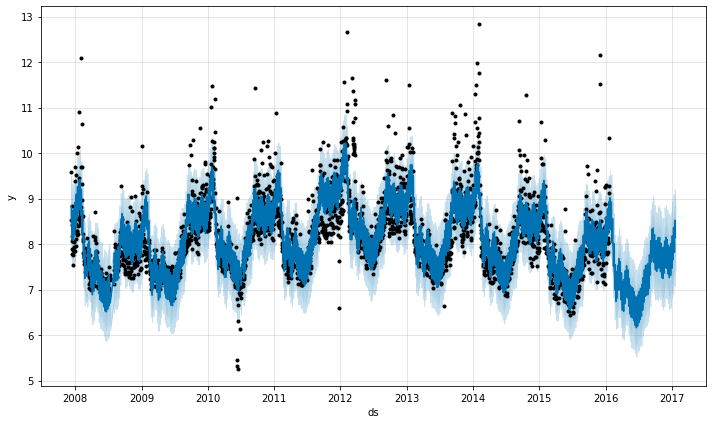

In [46]:
fig1 = m.plot(forecast)

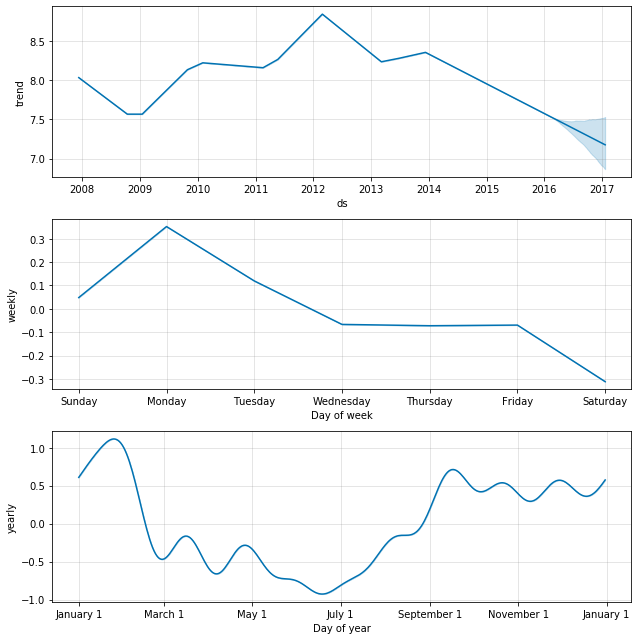

In [47]:
fig2 = m.plot_components(forecast)